In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

#### **Problema**
Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

**Descripción**

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

**Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.**

In [41]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/bank-marketing-campaign-data.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [43]:
df.drop_duplicates()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [44]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

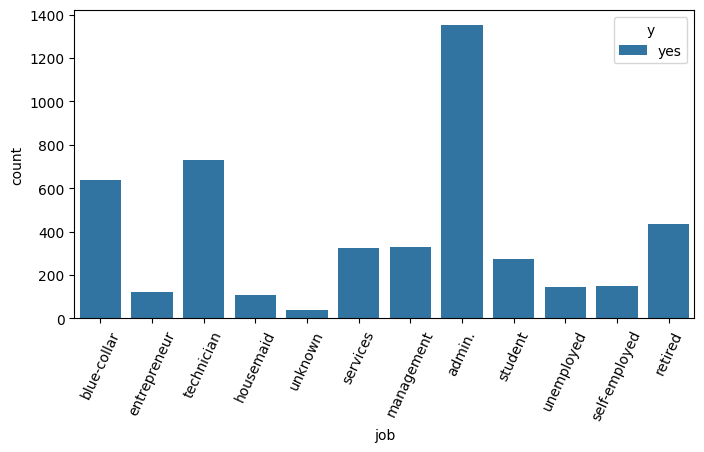

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(data=df[df['y'] == 'yes'], x='job', y=None, hue='y')
plt.xticks(rotation=65)  
plt.show()

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


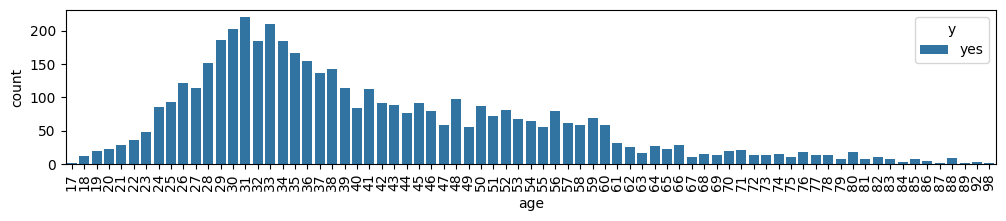

In [47]:
plt.figure(figsize=(12,2))
sns.countplot(data=df[df['y'] == 'yes'], x='age', y=None, hue='y')
plt.xticks(rotation=90)  
plt.show()

In [48]:
df['marital'][df['y'] == 'yes'].value_counts()

marital
married     2532
single      1620
divorced     476
unknown       12
Name: count, dtype: int64

In [49]:
df['marital'][df['y'] == 'no'].value_counts()

marital
married     22396
single       9948
divorced     4136
unknown        68
Name: count, dtype: int64

In [50]:
df['number_y'] = pd.factorize(df['y'])[0]
df['number_y'].value_counts()

number_y
0    36548
1     4640
Name: count, dtype: int64

In [51]:

df['number_job'] = pd.factorize(df['job'])[0]
df['number_job'].value_counts()


number_job
2     10422
3      9254
4      6743
1      3969
6      2924
5      1720
10     1456
8      1421
0      1060
7      1014
11      875
9       330
Name: count, dtype: int64

In [52]:

df['number_marital'] = pd.factorize(df['marital'])[0]
df['number_marital'].value_counts()
df['number_education'] = pd.factorize(df['education'])[0]
df['number_education'].value_counts()
df['number_default'] = pd.factorize(df['default'])[0]
df['number_default'].value_counts()
df['number_housing'] = pd.factorize(df['housing'])[0]
df['number_housing'].value_counts()
df['number_loan'] = pd.factorize(df['loan'])[0]
df['number_loan'].value_counts()
df['number_month'] = pd.factorize(df['month'])[0]
df['number_month'].value_counts()
df['number_contact'] = pd.factorize(df['contact'])[0]
df['number_contact'].value_counts()
df['number_day_of_week'] = pd.factorize(df['day_of_week'])[0]
df['number_day_of_week'].value_counts()
df['number_poutcome'] = pd.factorize(df['poutcome'])[0]
df['number_poutcome'].value_counts()

number_poutcome
0    35563
1     4252
2     1373
Name: count, dtype: int64

In [53]:
df['duration'][df['y'] == 'yes'].value_counts().head(25)

duration
301    16
207    15
187    15
229    14
200    14
182    14
209    14
192    14
252    13
226    13
257    12
295    12
288    12
251    12
396    12
268    12
210    12
173    12
293    11
175    11
239    11
415    11
255    11
160    11
394    11
Name: count, dtype: int64

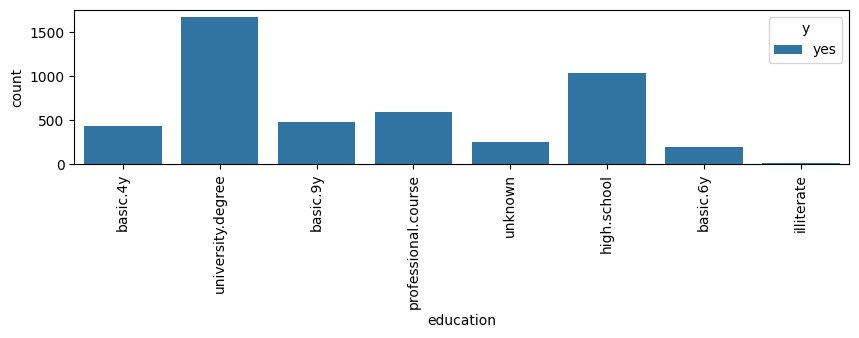

In [54]:
plt.figure(figsize=(10,2))
sns.countplot(data=df[df['y'] == 'yes'], x='education', y=None, hue='y')
plt.xticks(rotation=90)  
plt.show()

In [55]:
df_numerico = df.select_dtypes(include=['number'])

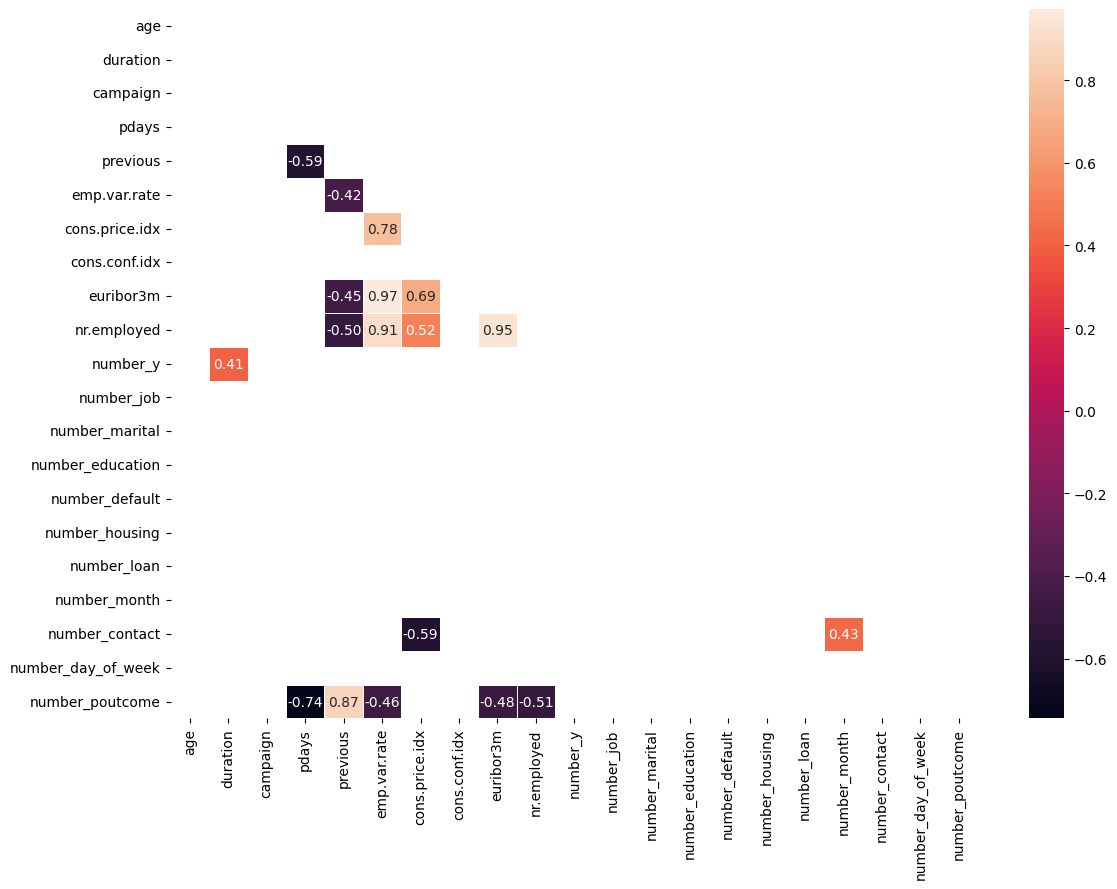

In [62]:

corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.4]
significant_corr
fig, axis = plt.subplots(figsize=(12, 9))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

- number_y/job compatible
- duration/job no compatible

<Axes: title={'center': 'Distribución de la variable objetivo (y)'}, xlabel='y'>

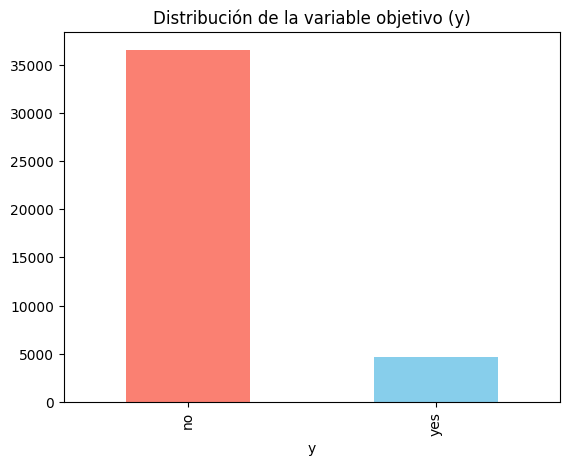

In [57]:
df['y'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'], title='Distribución de la variable objetivo (y)')

<Axes: xlabel='y', ylabel='age'>

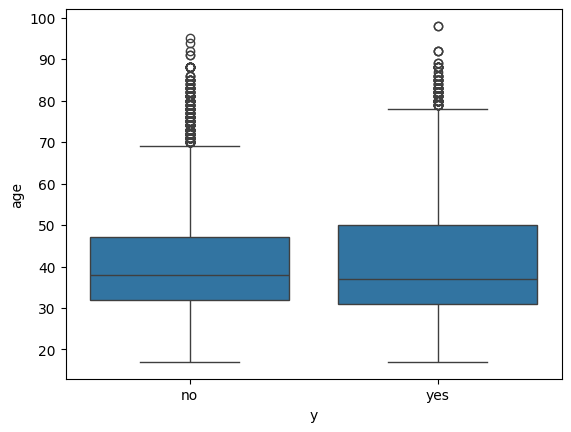

In [58]:

sns.boxplot(x='y', y='age', data=df)

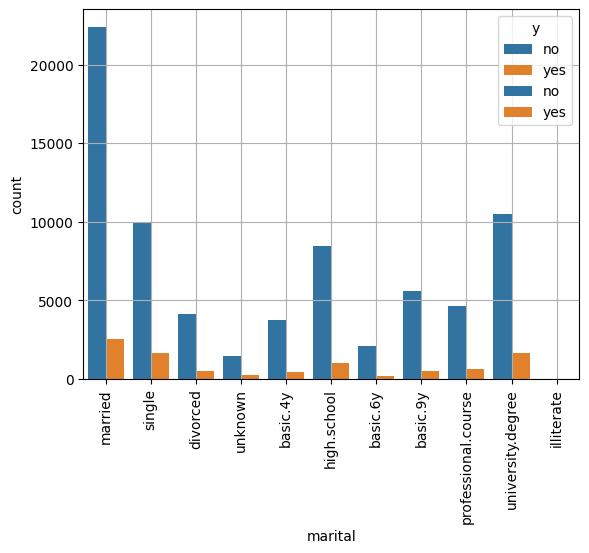

In [59]:
sns.countplot(x='marital', hue='y', data=df)
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()